This notebook seeks to convey a core concept of inferential thinking - given some set of observations about a small sample of a population, attempt to draw robust conclusions about the (unobservable) population.

Here we create a hypothetical population through simulation.  It is based on the historical discussion in the data8 lecture about estimating the size of foreign bomber fleets from the observations of tail markings.

In [2]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
# datascience version number of last run of this notebook
version.__version__

'0.3.dev19'

In [3]:
# The magic number - size of the population that (in the real world) 
# we don't know and want to estimate

def createPopulation():
    def serNo(x):
        return "{:05d}".format(x)
    p = Table([np.arange(1,37*55)],["Ser No"])
    p.set_format("Ser No", serNo)
    return p

In [4]:
# Create a simulation of the population as a table - ordered collection of named columns
population = createPopulation()
population

Ser No
00001
00002
00003
00004
00005
00006
00007
00008
00009
00010


In [5]:
# computational thinking - simulate observing a sample of the population
sample_size = 10

In [18]:
population.sample(sample_size,with_replacement=True)

Ser No
00625
01907
01892
01070
01361
01492
01762
01444
00365
00656


In [19]:
# Simulate observing multiple samples
nsamples = 30

In [20]:
# use iteration to create a table of samples 
samples = Table()
for i in range(nsamples):
    name = "sample-"+str(i)
    a_sample = population.sample(sample_size,with_replacement=True)
    samples[name] = a_sample["Ser No"]
samples

sample-0,sample-1,sample-2,sample-3,sample-4,sample-5,sample-6,sample-7,sample-8,sample-9,sample-10,sample-11,sample-12,sample-13,sample-14,sample-15,sample-16,sample-17,sample-18,sample-19,sample-20,sample-21,sample-22,sample-23,sample-24,sample-25,sample-26,sample-27,sample-28,sample-29
1551,1741,1321,314,921,674,1405,1715,2020,235,154,880,1006,434,1610,1251,1729,892,2033,173,1862,1671,604,1197,1668,231,1833,785,1850,1168
778,1124,741,568,1179,710,1351,146,14,1792,531,120,1216,43,1699,1277,1897,1205,1316,175,436,1786,203,1136,1289,911,1940,859,905,992
1226,1470,344,1538,230,954,195,402,1134,726,1465,939,73,1938,1769,576,22,1209,826,907,280,743,1552,10,1655,1449,1652,1075,1529,119
1193,204,1201,940,739,443,487,1839,1686,494,1923,1735,591,936,1285,1261,413,1403,186,1366,611,1008,1117,531,728,760,531,1515,670,1765
1317,1669,1061,709,534,559,140,189,1013,1930,428,1209,466,1220,1296,476,1057,283,1630,892,1699,1867,1993,1201,956,1210,1582,479,826,1903
1376,1756,1198,186,1159,1704,121,23,647,1506,1299,1879,760,1019,1208,1941,596,1263,505,211,1107,2026,704,701,150,1769,1512,1618,1939,1358
86,735,580,1698,2016,807,414,38,1079,1698,1191,292,1444,1356,645,877,1421,283,477,1744,316,1020,720,16,224,646,1987,1804,256,1990
622,34,605,1174,1432,880,1341,2031,576,2004,1289,945,377,895,567,716,1181,2014,1028,628,577,98,642,1610,440,961,1962,1066,1670,1383
316,1691,994,423,1190,1914,412,207,1722,386,1815,419,1118,894,1038,534,332,91,770,54,2002,6,739,1143,948,350,985,542,1050,557
709,2017,694,168,88,1727,1171,1472,1459,504,1510,463,1763,1611,2018,862,352,14,1490,253,517,412,1299,1271,151,1097,569,1988,1294,956


In [21]:
# gracefully transition between tables and arrays
samples['sample-0']

array([1551,  778, 1226, 1193, 1317, 1376,   86,  622,  316,  709])

In [23]:
# define a function to capture formally a idea about how to do the estimation
def estimateA(smpl) :
    return np.max(smpl)

In [24]:
estimateA(samples['sample-2'])

1321

In [26]:
# you might come up with lots of other estimators
def estimateB(smpl) :
    return 2*np.mean(smpl)

In [27]:
#verify it works
estimateA(samples["sample-0"])

1551

In [29]:
# illustrate list comprehension to explore data
[estimateB(samples[s]) for s in samples]

[1834.8,
 2488.1999999999998,
 1747.8,
 1543.5999999999999,
 1897.5999999999999,
 2074.4000000000001,
 1407.4000000000001,
 1612.4000000000001,
 2270.0,
 2255.0,
 2321.0,
 1776.2,
 1762.8,
 2069.1999999999998,
 2627.0,
 1954.2,
 1800.0,
 1731.4000000000001,
 2052.1999999999998,
 1280.5999999999999,
 1881.4000000000001,
 2127.4000000000001,
 1914.5999999999999,
 1763.2,
 1641.8,
 1876.8,
 2910.5999999999999,
 2346.1999999999998,
 2397.8000000000002,
 2438.1999999999998]

In [30]:
# Build a tables of estimates
estA = Table([[estimateA(samples[s]) for s in samples]],['ests'])
estA

ests
1551
2017
1321
1698
2016
1914
1405
2031
2020
2004


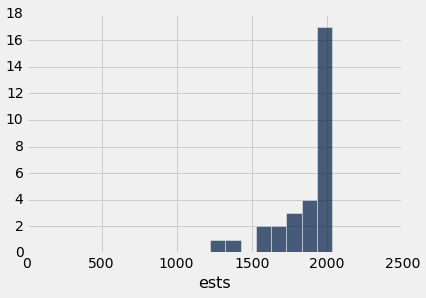

In [31]:
# Look at the behavior of this estimator as a histogram
estA.hist(range=(1,np.max(estA['ests'])),bins=20)

In [32]:
# Computational thinking: estimator as a higher order function 
# passed in to a function that creates a table of estimate
def estimate(estimator):
    return Table([[estimator(samples[s]) for s in samples]],['ests'])

In [33]:
estB = estimate(estimateB)

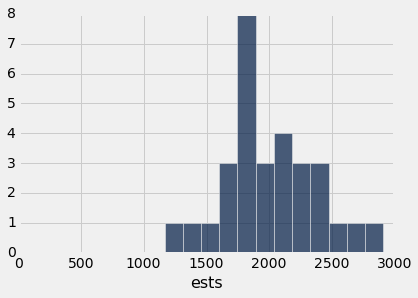

In [34]:
estB.hist(range=(1,np.max(estB['ests'])),bins=20)

In [35]:
comp = Table([estA['ests'],estB['ests']],['estA','estB'])

In [36]:
comp

estA,estB
1551,1834.8
2017,2488.2
1321,1747.8
1698,1543.6
2016,1897.6
1914,2074.4
1405,1407.4
2031,1612.4
2020,2270
2004,2255


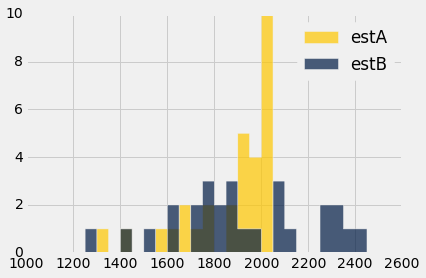

In [37]:
comp.hist(overlay=True, bins=np.arange(1000,2500,50))

In [38]:
# How does these estimates compare with the true size of the population?
population.num_rows

2034

In [39]:
# Produce a table containing the data associated with a histogram
ebins = comp.bin(bins=np.arange(1000,2500,50))
ebins.show()

bin,estA count,estB count
1000,0,0
1050,0,0
1100,0,0
1150,0,0
1200,0,0
1250,0,1
1300,1,0
1350,0,0
1400,1,1
1450,0,0
